In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\waterpotability.csv")
df.head()
print(df.shape)
print(df.isnull().sum())

(3276, 10)
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [33]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


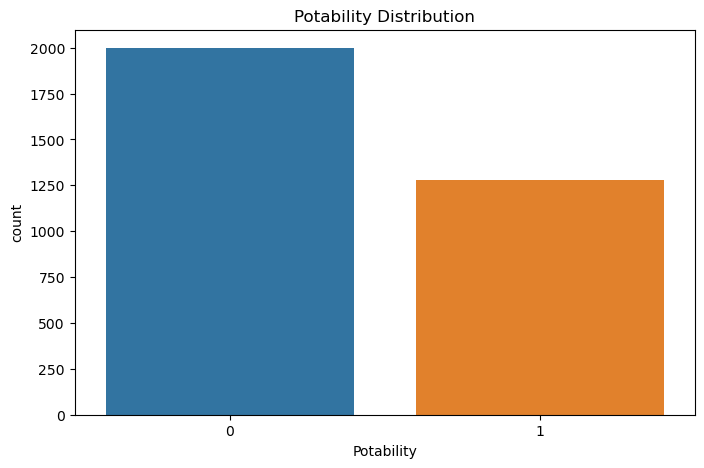

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


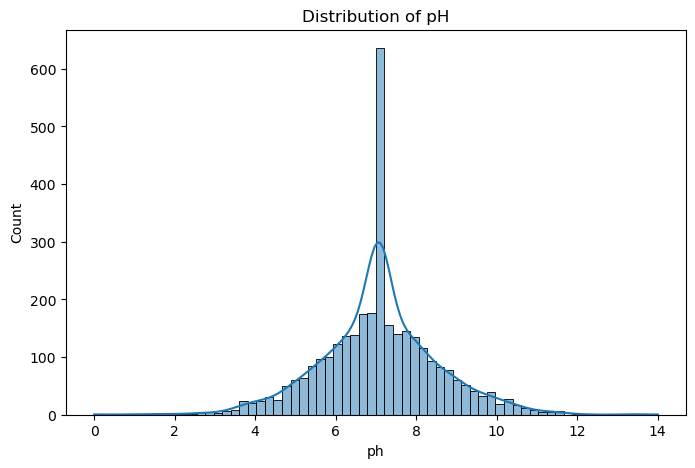

In [34]:
# Plot count distribution of 'Potability'
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=df)
plt.title('Potability Distribution')
plt.show()

# Plot distribution of 'ph'
plt.figure(figsize=(8, 5))
sns.histplot(df['ph'], kde=True)
plt.title('Distribution of pH')
plt.show()


In [35]:
# Define features and target
X = df.drop('Potability', axis=1)
Y = df['Potability']


In [36]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)


In [37]:
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=10, splitter='best')
dt.fit(X_train, Y_train)

# Make predictions
predictions = dt.predict(X_test)

# Print evaluation metrics
print(f"Accuracy Score = {accuracy_score(Y_test, predictions) * 100:.2f}%")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, predictions)}")


Accuracy Score = 59.15%
Confusion Matrix:
[[276 126]
 [142 112]]


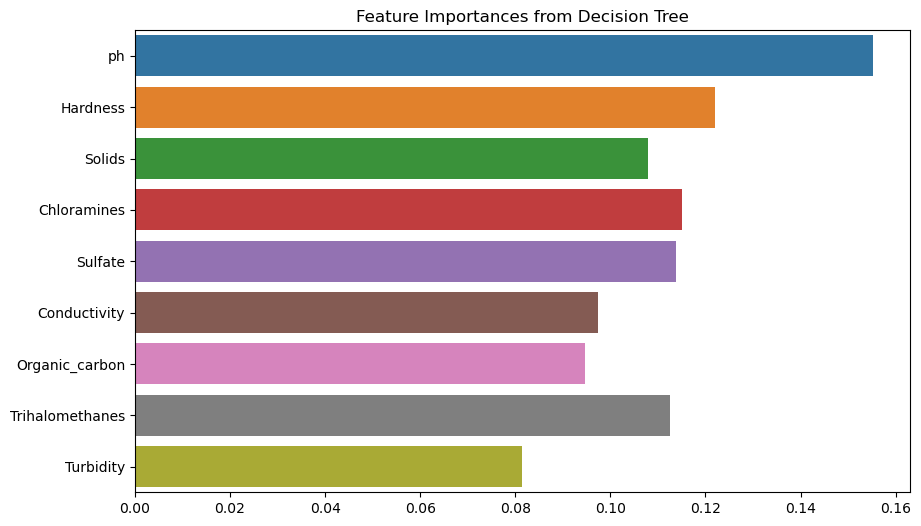

In [38]:
# Plot feature importances
importances = dt.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances from Decision Tree')
plt.show()
